# Assignment 10 - Funaro

We want to apply machine learning to the given datas. With machine learning we create mathematical models to help understand datas. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of news datas.


Before we have to read and create the dataframe with the datas analyzed in the previous assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib notebook

In [2]:
ExternalFilesFolder =  r"C:\Users\Nora\Documents\Piacenza\Building systems\Python\Data-driven_Building_simulation_Polimi_EETBS\Python Files--Short-term Prediction of Residential AC Load\2018-2019"
os.chdir(ExternalFilesFolder) 
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)

DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)
PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 
DF_consumption.index.dayofweek

DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather
DF_Temperature= DF_weather[["temperature"]]

DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0

DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned_chosenDates=DF_joined_cleaned["2014-08-01":"2014-08-03"]

DF_joined_cleaned_chosenDates["temperature"]=DF_joined_cleaned_chosenDates["temperature"].shift(-5)
DF_joined_cleaned_chosenDates.dropna()  
DF_joined_cleaned_chosenDates.head()
DF_joined_cleaned_chosenDates.describe()

DF_joined_cleaned_chosenDates_min=DF_joined_cleaned_chosenDates.min()
DF_joined_cleaned_chosenDates_max=DF_joined_cleaned_chosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleaned_chosenDates-DF_joined_cleaned_chosenDates_min)/(DF_joined_cleaned_chosenDates_max-DF_joined_cleaned_chosenDates_min)

C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydat

In [3]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod=DF_joined.copy()
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)
DF_mod=DF_mod.dropna()
lag_start=1
lag_end=6
lag_interval=1
column_name="temperature"
df=DF_mod

def lag_feature (df,column_name,lag_start, lag_end, lag_interval):
    for i in range(lag_start, lag_end+1, lag_interval):
        new_column_name=column_name+" -"+str(i)+"hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)
        df.dropna(inplace=True)
    return df 
   
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_consumption","gen":"irradiance"})

DF_mod=lag_feature(DF_mod,"temperature",1,6,1)   
DF_mod=lag_feature(DF_mod,"irradiance",3,6,1)
DF_mod=lag_feature(DF_mod,"AC_consumption",1,24,1)
DF_mod["hour"]=DF_mod.index.hour

temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr
AC_consumption -1hr
AC_consumption -2hr
AC_consumption -3hr
AC_consumption -4hr
AC_consumption -5hr
AC_consumption -6hr
AC_consumption -7hr
AC_consumption -8hr
AC_consumption -9hr
AC_consumption -10hr
AC_consumption -11hr
AC_consumption -12hr
AC_consumption -13hr
AC_consumption -14hr
AC_consumption -15hr
AC_consumption -16hr
AC_consumption -17hr
AC_consumption -18hr
AC_consumption -19hr
AC_consumption -20hr
AC_consumption -21hr
AC_consumption -22hr
AC_consumption -23hr
AC_consumption -24hr


In [4]:
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24)
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)
DF_mod[["hour","sin_hour","cos_hour"]].head(24)

DF_mod["day_of_week"]=DF_mod.index.dayofweek
DF_mod["month"]=DF_mod.index.month
DF_mod["week_of_year"]=DF_mod.index.week

def WeekendDetector(day):
    if(day==5 or day==6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel

DF_mod["weekend"]=DF_mod["day_of_week"].apply(WeekendDetector)

def DayDetector(hour):
    if(hour<19 or hour>9):
        DayLabel=1
    else:
        DayLabel=0
    return DayLabel
    
DF_mod["WorkingTime"]=DF_mod["hour"].apply(DayDetector)

We consider a period from march to september beacuse air conditioning is working in this period

In [5]:
DF_mod=DF_mod["2014-03-01":"2014-09-30"]

DF_target= DF_mod["AC_consumption"] 
DF_features= DF_mod.drop("AC_consumption", axis=1)

Here we start the part regarding the machine learning.

When we are working on a model we have to test it on some test datas. We can split the given datas into two parts, one for training and the other one for testing.
During training, we let the model 'see' the answers so it can learn how to predict the future values from the given database. During training session we expect to be some relationship between all the features and the target value, and the model's aim is to learn this relationship during training.


The SciKit library provides a tool, called the 'Model Selection'. Using the'train_test_split' we can easily split the dataset into the training and the testing datasets in various proportions.

The parameter 'test_size' decides the size of the data that has to be split as the test dataset and it is given as a fraction.

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size = 0.2, random_state=41234)


Here we are importing a linear model for regression. The linear model minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

After importing the linear model we fit it and then we predict datas using the linear model  estimated before.

At the end we plot the predicted values of 'AC consumption' for the month of august together with the given AC consumption.

<IPython.core.display.Javascript object>


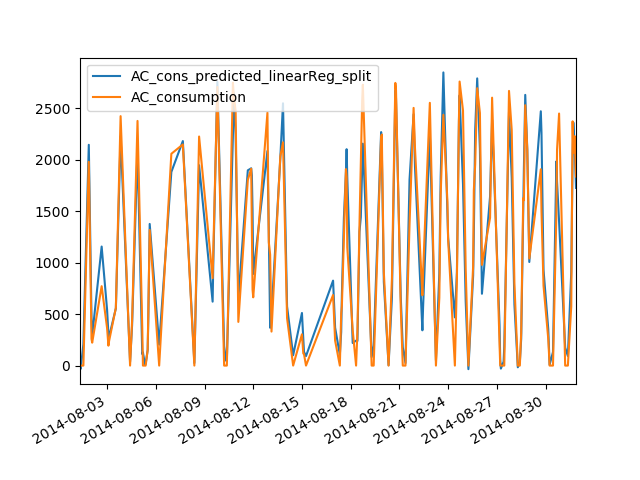

In [7]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

linear_reg.fit(X_train, Y_train)
predicted_linearReg_split = linear_reg.predict(X_test)

predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split,index=Y_test.index, columns=["AC_cons_predicted_linearReg_split"])
predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)

predicted_DF_linearReg_split_august=predicted_DF_linearReg_split["2014-08-01":"2014-08-31"]
predicted_DF_linearReg_split_august.plot()

Now we have to evaluate how accurate the predictions are. We can calculate the error between the test datas and the predicted ones with imported functions.

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split= mean_absolute_error(predicted_linearReg_split,Y_test)
MSE_linearReg_split= mean_squared_error(predicted_linearReg_split,Y_test)
R2_linearReg_split = r2_score(predicted_linearReg_split,Y_test)

The second way of doing this is using k-fold cross valiadtion.
That k-fold cross validation is a procedure used to estimate the skill of the model on new datas.

<IPython.core.display.Javascript object>


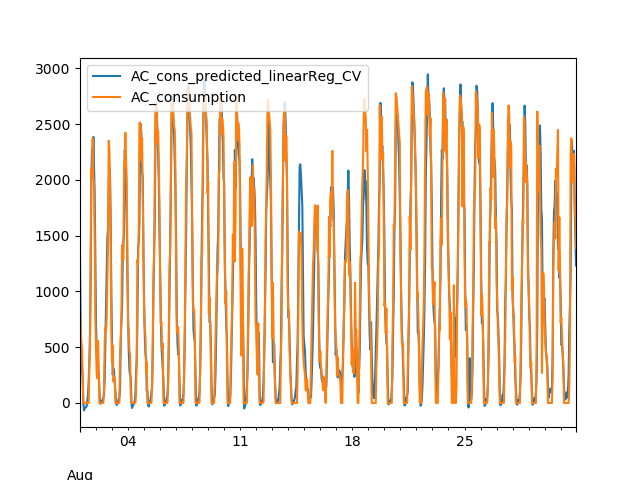

In [9]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predicted_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV,
                                       index=DF_target.index, 
                                       columns=["AC_cons_predicted_linearReg_CV"])
predicted_DF_linearReg_CV=predicted_DF_linearReg_CV.join(DF_target)
predicted_DF_linearReg_CV_august=predicted_DF_linearReg_CV["2014-08-01":"2014-08-31"]
predicted_DF_linearReg_CV_august.plot()

MAE_linearReg_CV= mean_absolute_error(predict_linearReg_CV,DF_target)
MSE_linearReg_CV= mean_squared_error(predict_linearReg_CV,DF_target)
R2_linearReg_CV = r2_score(predict_linearReg_CV,DF_target)

Now we try the 'random forests algorithm' and we evaluate again the errors.

<IPython.core.display.Javascript object>


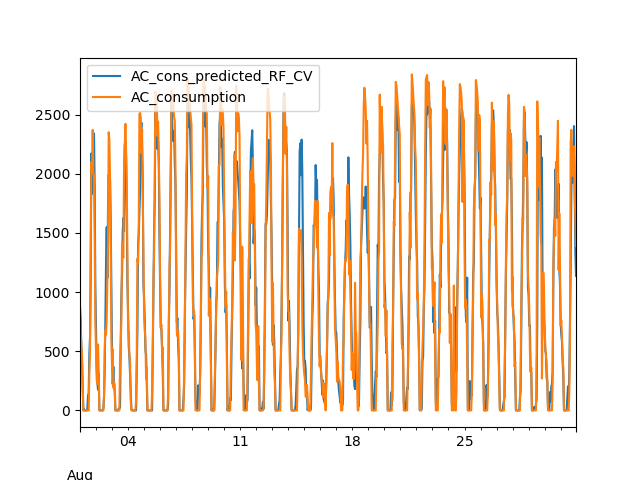

In [10]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()
predict_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predicted_DF_RF_CV=pd.DataFrame(predict_RF_CV,
                                       index=DF_target.index, 
                                       columns=["AC_cons_predicted_RF_CV"])
predicted_DF_RF_CV=predicted_DF_RF_CV.join(DF_target)
predicted_DF_RF_CV_august=predicted_DF_RF_CV["2014-08-01":"2014-08-31"]
predicted_DF_RF_CV_august.plot()

MAE_RF_CV= mean_absolute_error(predict_RF_CV,DF_target)
MSE_RF_CV= mean_squared_error(predict_RF_CV,DF_target)
R2_RF_CV = r2_score(predict_RF_CV,DF_target)


We can also use the 'online training method', that is an improvization method of learning step, where the weights for the model used is updated every time the new datas arrive, instead of re-training the whole model. This is basically a step-wise learning method. 

In the online training method we make predictions hourly, so in a more accurate way. Each hour we update the model. The previous algorithms were prefixed methods, here we arrange our training process as the datas arrive hourly.




In [11]:
DF_onlineConsumptionPrediction = pd.DataFrame(index=DF_mod.index)
period_of_training = pd.Timedelta(30, unit="d")

FirstTimeStamp_measured = DF_mod.index[0]
LastTimeStamp_measured = DF_mod.index[-1]


The first month we train and the second month we predict and we alternate this trend from march to september.
The firstTimeStamp_toPredict is the first day of the month and the next 30 days that we add.
Then I set the first day and the last day of training session.

In [12]:
FirstTimeStamp_toPredict= FirstTimeStamp_measured+period_of_training

training_startTimeStamp=FirstTimeStamp_measured
training_endTimeStamp=FirstTimeStamp_toPredict

At the end of the while cycle we saved the real and the predicted datas in the dataframe. Then
we improve the cycle of one hour and we do the same process for each hour of the day. Then we evaluate again the error.

At the end of this analysis we can observe that the error evaluated with Online Learning is closer to one with respect to the previous methods, so we have a more accurate prediction of the values.

In [ ]:
TimeStamp_toPredict=FirstTimeStamp_toPredict
while (TimeStamp_toPredict<LastTimeStamp_measured):   
    DF_features_train = DF_features.truncate(before=training_startTimeStamp,after= training_endTimeStamp) 
    DF_target_train = DF_target.truncate(before=training_startTimeStamp,after= training_endTimeStamp) 
    DF_features_test = DF_features.loc[TimeStamp_toPredict].values.reshape(1,-1)   
    DF_target_test = DF_target.loc[TimeStamp_toPredict]
    reg_RF.fit(DF_features_train, DF_target_train)     
    predicted_consumption= reg_RF.predict(DF_features_test)    
    DF_onlineConsumptionPrediction.loc[TimeStamp_toPredict,"Real"] =DF_target_test
    DF_onlineConsumptionPrediction.loc[TimeStamp_toPredict,"Predicted"] =predicted_consumption
    TimeStamp_toPredict=TimeStamp_toPredict+pd.Timedelta(1,unit="h")       
    training_endTimeStamp=training_endTimeStamp+pd.Timedelta(1,unit="h")
    training_startTimeStamp=training_startTimeStamp+pd.Timedelta(1,unit="h")

DF_features_test

DF_onlineConsumptionPrediction.dropna(inplace=True)
R2_score_RF= r2_score(DF_onlineConsumptionPrediction[["Real"]],DF_onlineConsumptionPrediction[["Predicted"]]) 
DF_onlineConsumptionPrediction.plot()

DF_onlineConsumptionPrediction_august=DF_onlineConsumptionPrediction["2014-08-01":"2014-08-31"]
DF_onlineConsumptionPrediction_august.plot()


